<h1> Artifical Intelligence 1 </h1>
<h2> Assignment 1 </h2>
<h2> 119401422 - Hamza Hassan Khan </h2>
<ul>
    <li>Raw Data Analysis</li>
    <li>Dataset Cleanup and Analysis</li>
    <li>Test and Dev Set Creation</li>
    <li>K-Nearst Neighbour</li>
    <li>Linear Regression</li>
    <li>Ridge Regression</li>
    <li>Random Forests</li>
    <li>Evaluation on the Testset</li>
    <li>Expirements</li>
</ul>

In [221]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import scatterplot, heatmap

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin


In [223]:
df = pd.read_csv('datasets/dataset_salaries.csv')

In [224]:
pd.set_option("display.max_rows", None)

<h2>Raw Data Analysis</h2>

In [225]:
df.shape

(62642, 17)

In [226]:
df[0:5000]

timestamp                         company  \
0       6/7/2017 11:33:27                          Oracle   
1      6/10/2017 17:11:29                            eBay   
2      6/11/2017 14:53:57                          Amazon   
3      6/14/2017 21:22:25                       Microsoft   
4      6/16/2017 10:44:01                          Amazon   
5       6/17/2017 0:23:14                           Apple   
6      6/20/2017 10:58:51                       Microsoft   
7      6/20/2017 18:49:59                          Amazon   
8      6/21/2017 17:27:47                       Microsoft   
9      6/22/2017 12:37:51                       Microsoft   
10     6/22/2017 13:55:26                       Microsoft   
11     6/22/2017 21:39:48                            Uber   
12     6/22/2017 23:08:16                       Microsoft   
13     6/26/2017 21:25:45                       Microsoft   
14     6/29/2017 15:14:16                       Microsoft   
15     6/30/2017 16:29:50                      Salesforce   
16      7/2/2017 14:16:51                       Microsoft   
17      7/3/2017 19:28:09                       Microsoft   
18      7/7/2017 22:29:34                       Microsoft   
19      7/8/2017 14:41:38                       Microsoft   
20     7/14/2017 21:36:15                          Amazon   
21     7/16/2017 16:50:46                          Amazon   
22     7/20/2017 22:35:49                        Facebook   
23     7/21/2017 15:34:53                        Facebook   
24     7/22/2017 22:20:17                            Uber   
25     7/24/2017 12:21:07                           Apple   
26     7/24/2017 23:14:39                       Microsoft   
27     7/25/2017 11:01:33                          Amazon   
28     7/25/2017 14:44:53                            Oath   
29     7/25/2017 19:22:37                          Google   
30     7/28/2017 15:34:42                      Salesforce   
31     7/29/2017 19:37:16                       Microsoft   
32     7/29/2017 19:56:08                       Microsoft   
33     7/31/2017 15:54:17                          Amazon   
34     7/31/2017 15:55:01                          Amazon   
35      8/1/2017 12:55:06                       Microsoft   
36      8/1/2017 13:46:54                       Microsoft   
37       8/4/2017 2:43:00                          Oracle   
38      8/4/2017 11:04:03                       Microsoft   
39      8/6/2017 12:23:42                       Microsoft   
40      8/6/2017 22:23:02                           Apple   
41      8/6/2017 22:26:38                       Microsoft   
42      8/6/2017 23:33:31                          Amazon   
43       8/7/2017 2:08:48                          Google   
44      8/7/2017 11:19:56                          Google   
45       8/8/2017 5:54:25                          Amazon   
46      8/8/2017 14:14:26                         Netflix   
47     8/10/2017 18:05:43                           Apple   
48     8/13/2017 10:57:56                          Amazon   
49     8/16/2017 19:25:50                          Amazon   
50     8/17/2017 12:45:15                       Microsoft   
51     8/17/2017 20:37:19                            Uber   
52     8/18/2017 21:57:34                           Apple   
53      8/20/2017 1:20:52                      Salesforce   
54      8/20/2017 9:52:53                       Microsoft   
55     8/20/2017 19:16:32                           Apple   
56     8/21/2017 13:19:06                         Expedia   
57     8/22/2017 18:42:36                       Microsoft   
58     8/23/2017 16:49:36                       Microsoft   
59     8/23/2017 23:54:07                          Amazon   
60      8/24/2017 7:22:43                          Amazon   
61     8/24/2017 11:18:18                          Zillow   
62     8/24/2017 18:01:56                            Uber   
63     8/24/2017 23:13:50                          Amazon   
64     8/24/2017 23:55:29                          

<p>The visual representation of our dataset helps us understand the data that we are dealing with, in the terms of values </p>

In [227]:
df.describe()

totalyearlycompensation  yearsofexperience  yearsatcompany  \
count             6.264200e+04       62642.000000    62642.000000   
mean              3.175327e+03           7.191054        2.700616   
std               3.877877e+04           6.437148        3.524030   
min               0.000000e+00           0.000000        0.000000   
25%               1.160000e+02           3.000000        0.000000   
50%               1.830000e+02           6.000000        1.000000   
75%               2.690000e+02          10.000000        4.000000   
max               3.386013e+06          90.000000       90.000000   

         basesalary  stockgrantvalue          bonus        cityid  \
count  6.264200e+04     6.264200e+04   62642.000000  62642.000000   
mean   1.798145e+03     1.134865e+03     242.317199   9856.201989   
std    1.927194e+04     2.520611e+04    3709.187697   6679.104563   
min    0.000000e+00     0.000000e+00       0.000000      0.000000   
25%    8.800000e+01     0.000000e+00       1.000000   7369.000000   
50%    1.310000e+02     2.300000e+01      13.000000   7839.000000   
75%    1.810000e+02     6.400000e+01      27.000000  11521.000000   
max    2.057772e+06     3.140803e+06  384026.000000  47926.000000   

              dmaid     rowNumber  
count  62640.000000  62642.000000  
mean     616.097222  41694.723732  
std      289.843390  24488.865879  
min        0.000000      1.000000  
25%      506.000000  20069.250000  
50%      807.000000  42019.000000  
75%      807.000000  63021.750000  
max      881.000000  83875.000000

<p>Descibe summerizes our dataset in terms of percents and ratios, which helps us understand the data</p>

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62527 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  int64  
 7   yearsatcompany           62642 non-null  int64  
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  int64  
 11  bonus                    62642 non-null  int64  
 12  gender                   43102 non-null  object 
 13  otherdetails             40139 non-null  object 
 14  cityid                

<p>The info displays the datatype that we are dealing with </p>

In [229]:
df['timestamp'].min()

'1/1/2019 11:38:29'

In [230]:
df['timestamp'].max()

'9/9/2020 9:57:39'

 <p>I had a look at this information to see the time period of the dataset, it turns out to be One Year, Eight Months and 8 Days of data </p>

In [231]:
titles = df['title'].value_counts(dropna=False)

In [232]:
titles_labels = titles.keys()

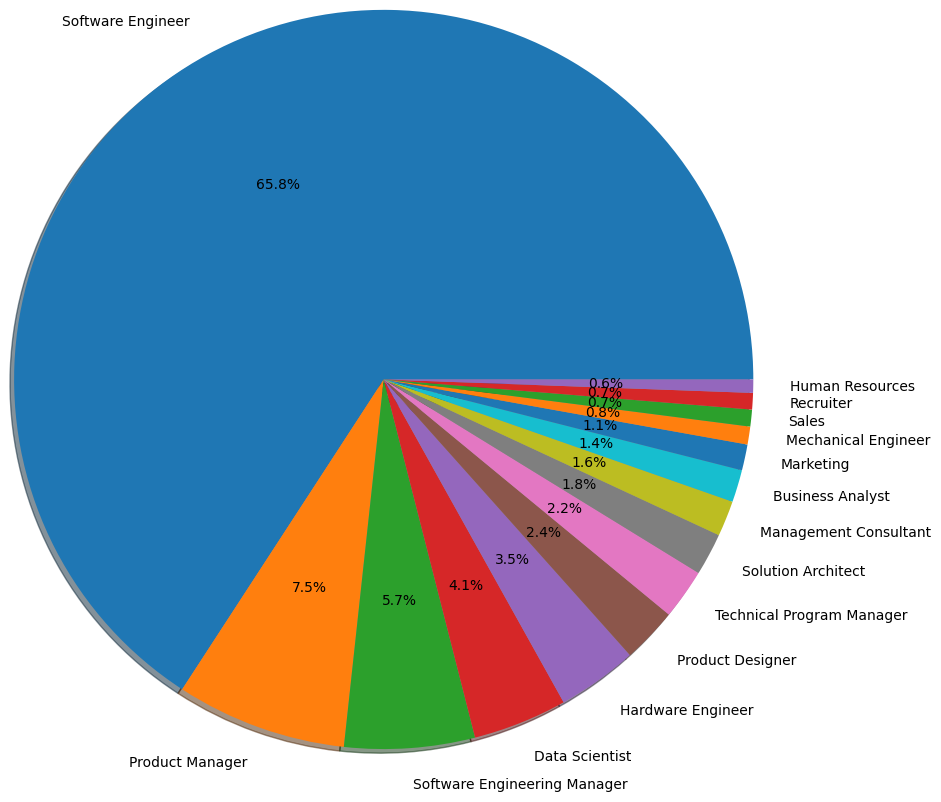

In [233]:
plt.pie(titles,labels = titles_labels,radius=2.5, autopct='%1.1f%%',shadow=True)
plt.show()

<p>This Pie Chart represents, the professios in terms of percents. This helps us to see what professions do we have in the dataset, So later we can use them to see how the impact out target feature </p>

In [234]:
sal = df.groupby('title')[['title','basesalary']]

In [235]:
sal.describe()

basesalary                                  \
                                  count         mean           std  min   
title                                                                     
Business Analyst                  885.0   102.871186     52.369287  0.0   
Data Scientist                   2578.0   904.607836  10754.643330  0.0   
Hardware Engineer                2200.0   280.387273   4670.389131  0.0   
Human Resources                   364.0   131.835165     69.525866  0.0   
Management Consultant             976.0   136.580943     77.529439  6.0   
Marketing                         710.0   147.438028     80.763867  0.0   
Mechanical Engineer               490.0   284.157143   3688.709660  0.0   
Product Designer                 1516.0   481.693931   7078.794779  0.0   
Product Manager                  4673.0  3173.134389  27998.217655  0.0   
Recruiter                         451.0   118.246120     56.662307  0.0   
Sales                             461.0   119.440347     64.571996  0.0   
Software Engineer               41231.0  2005.034949  20301.334175  0.0   
Software Engineering Manager     3569.0  2462.938918  22298.435680  0.0   
Solution Architect               1157.0  1585.171132  17889.538039  0.0   
Technical Program Manager        1381.0   154.694424     64.597522  0.0   

                                                                
                                 25%    50%     75%        max  
title                                                           
Business Analyst               66.00   95.0  129.00      386.0  
Data Scientist                 90.25  131.0  180.00   252028.0  
Hardware Engineer              95.00  134.0  180.00   155635.0  
Human Resources                82.00  125.0  175.00      430.0  
Management Consultant          85.00  123.0  174.00     1057.0  
Marketing                      97.00  133.5  184.75     1013.0  
Mechanical Engineer            82.00  111.5  148.00    81762.0  
Product Designer               91.00  131.0  181.25   195758.0  
Product Manager                99.00  145.0  196.00  1098310.0  
Recruiter                      76.00  111.0  149.50      378.0  
Sales                          72.00  108.0  158.00      438.0  
Software Engineer              85.00  127.0  177.00  2057772.0  
Software Engineering Manager  114.00  168.0  230.00   556416.0  
Solution Architect             94.00  134.0  189.00   351239.0  
Technical Program Manager     107.00  147.0  195.00      593.0

<p>This chart groups the salary with the profession('title'), for exampl, there are 2578 Data Scientists in our dataset, This gives us an idea of how base salary can vary with profession in thid

</p>

In [236]:
df['title'][df['basesalary']== 2057772]

814    Software Engineer
Name: title, dtype: object

<p>  This was to quickly verfiy if the information on the satistics is correct, EG a person with the highest incom is a software engineer </p>

C:\Users\Hammozi\AppData\Local\Temp\ipykernel_17312\954770141.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sal.mean().plot(kind='barh',figsize=(13, 13),title="Mean Salaries",ylabel="Titles",xlabel="Average Base Salary")


<AxesSubplot: title={'center': 'Mean Salaries'}, xlabel='Average Base Salary', ylabel='Titles'>

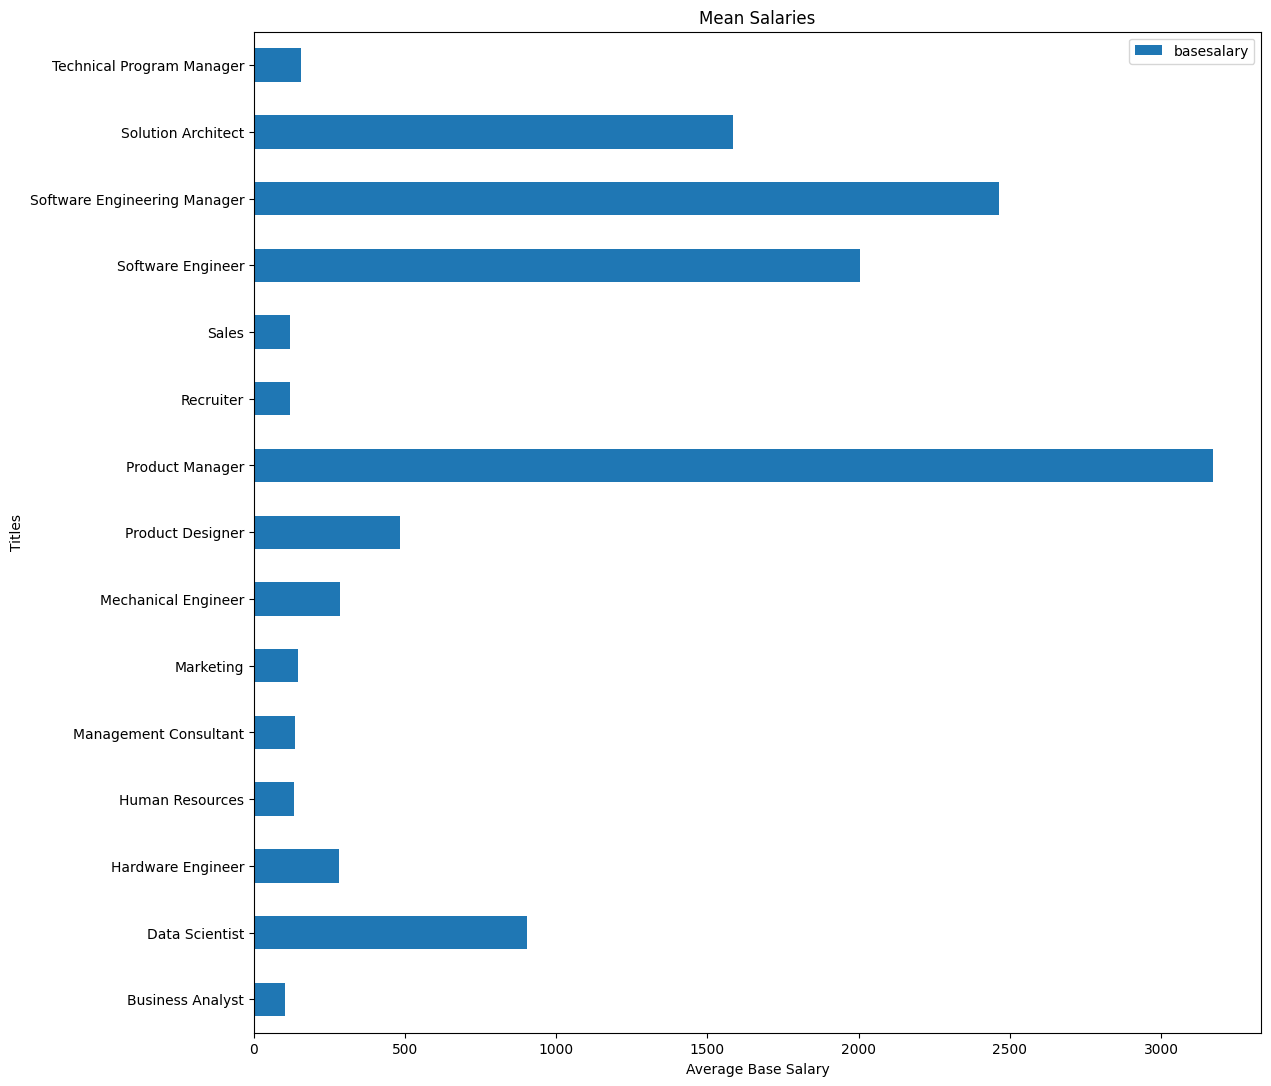

In [237]:
sal.mean().plot(kind='barh',figsize=(13, 13),title="Mean Salaries",ylabel="Titles",xlabel="Average Base Salary") 

<p> This is the visual representation of Profession with their mean salaries, Again this give us info of high paying professions </p>

In [238]:
loc_sal = df.groupby('location')[['location','basesalary']]

C:\Users\Hammozi\AppData\Local\Temp\ipykernel_17312\4228564081.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loc_sal.mean()['basesalary'].nlargest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by locations(Largest)",ylabel="Locations",xlabel="Average Base Salary")


<AxesSubplot: title={'center': 'Mean Salaries by locations(Largest)'}, xlabel='Average Base Salary', ylabel='Locations'>

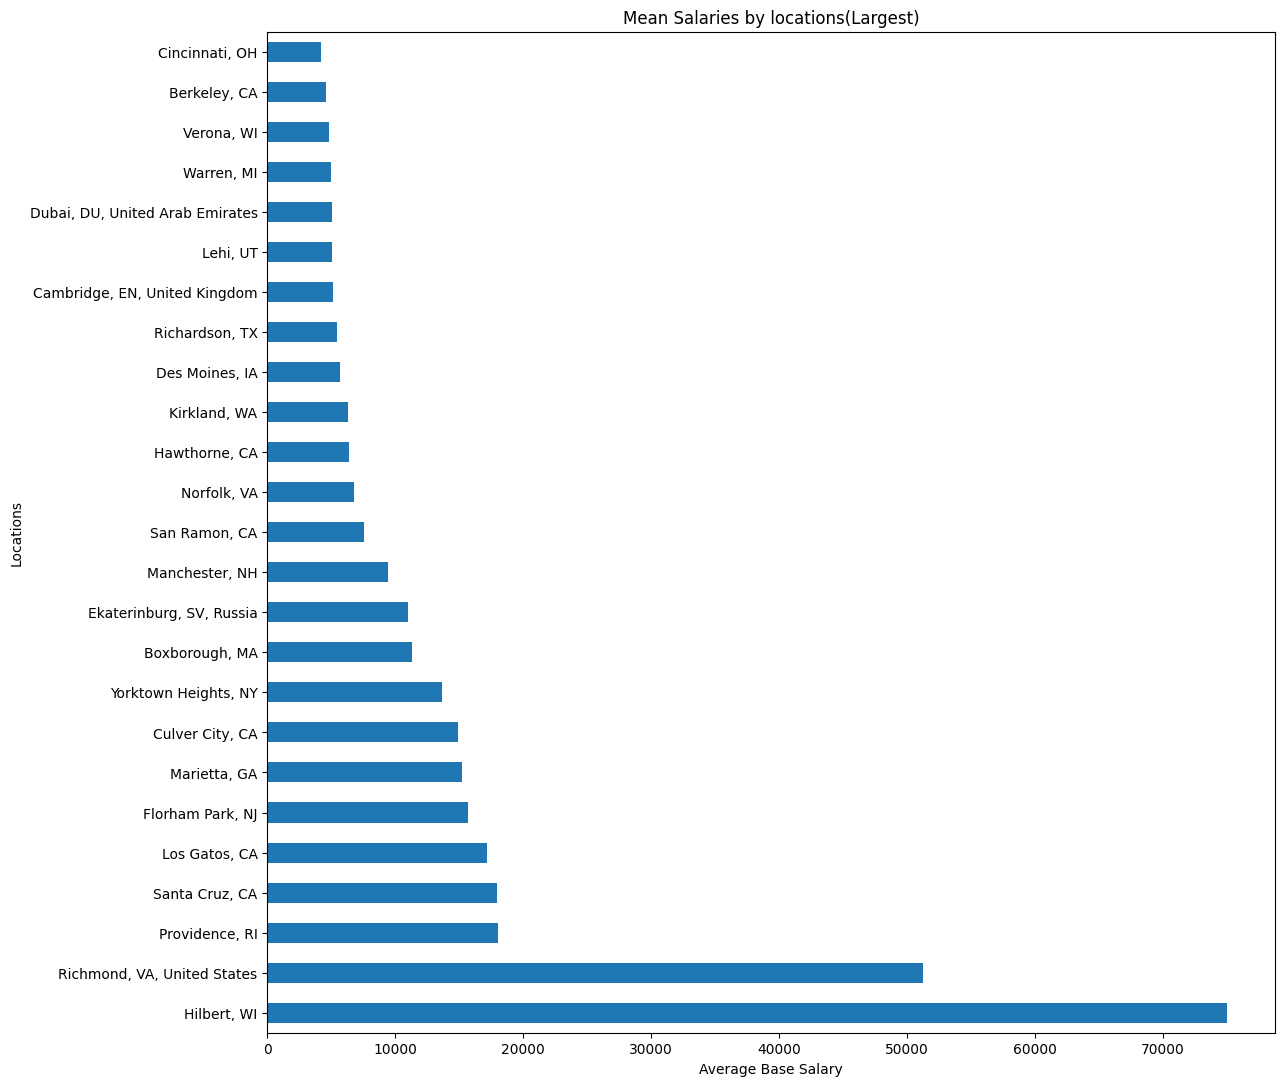

In [239]:
loc_sal.mean()['basesalary'].nlargest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by locations(Largest)",ylabel="Locations",xlabel="Average Base Salary")

<p> Similarly we have a look at the average salary by location to see if location impacts the salary  </p>

C:\Users\Hammozi\AppData\Local\Temp\ipykernel_17312\741674851.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loc_sal.mean()['basesalary'].nsmallest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by locations(Smallest)",ylabel="Locations",xlabel="Average Base Salary")


<AxesSubplot: title={'center': 'Mean Salaries by locations(Smallest)'}, xlabel='Average Base Salary', ylabel='Locations'>

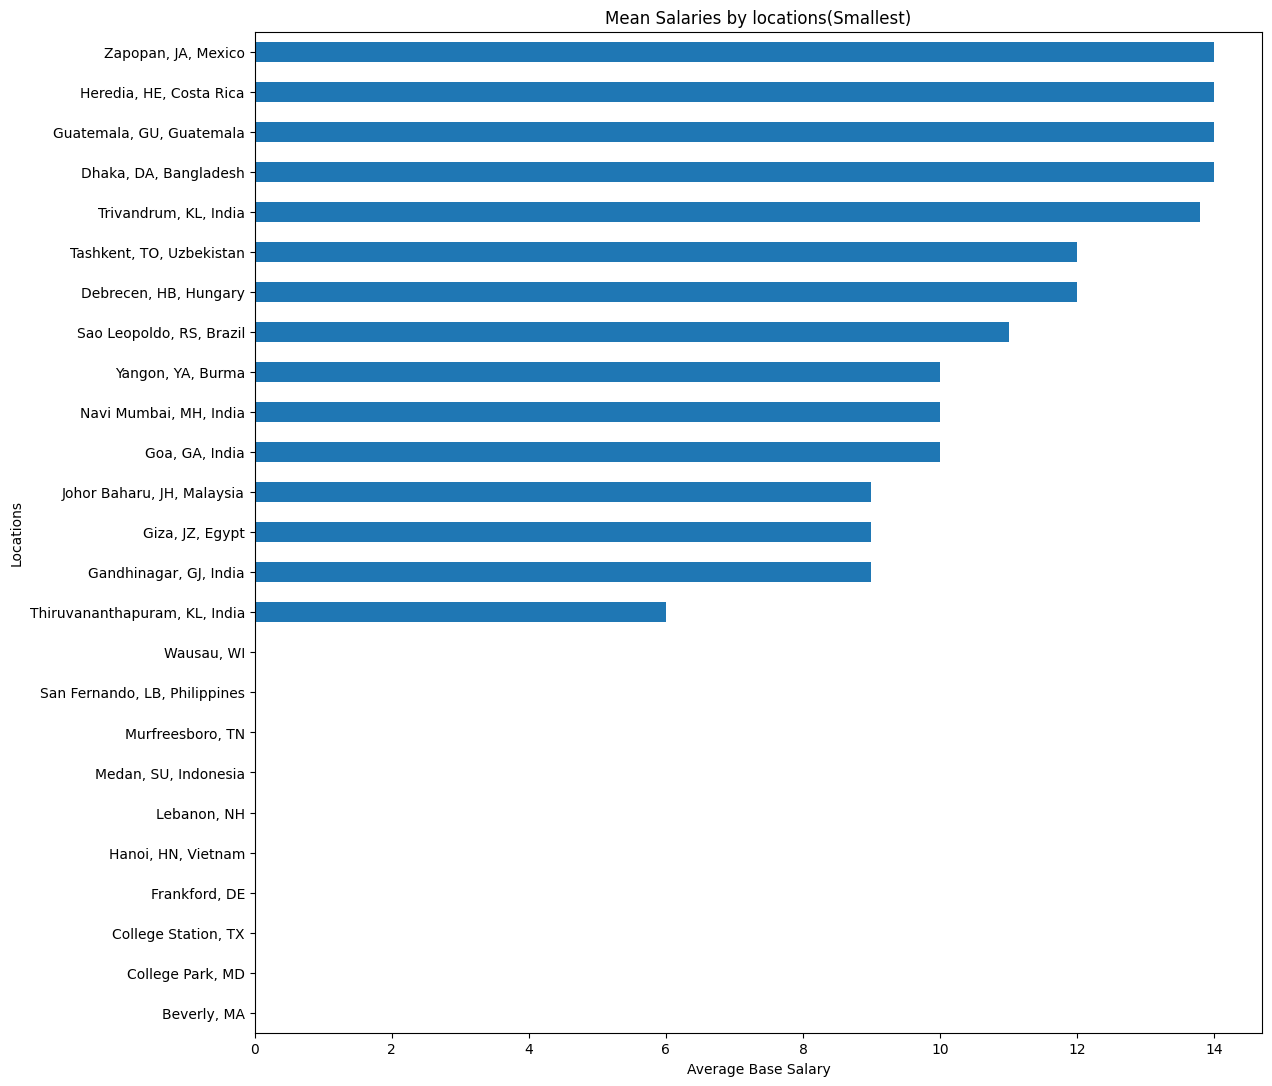

In [240]:
loc_sal.mean()['basesalary'].nsmallest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by locations(Smallest)",ylabel="Locations",xlabel="Average Base Salary") 

In [241]:
genders = df['gender'].value_counts(dropna=False)

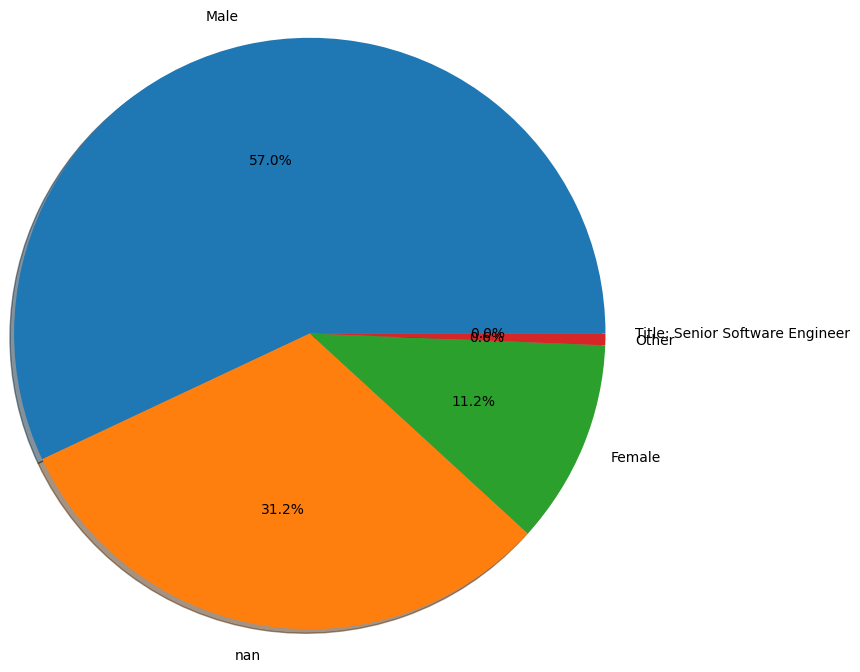

In [242]:
plt.pie(genders,labels = genders.keys(),radius=2, autopct='%1.1f%%',shadow=True)
plt.show()

<p> This chat was to anayse if  gender would impact salary. At the fist glance, I notice 31% Nan Values and there is a title in place of a gender. One of the rowes had a title in place of gender or a non value so I decided to remove it</p>

In [243]:
df[df['gender']== 'Title: Senior Software Engineer']

timestamp company level              title  \
11793  9/17/2019 6:23:02  GitHub    E4  Software Engineer   

       totalyearlycompensation  location  yearsofexperience  yearsatcompany  \
11793                      217  Buda, TX                 14               6   

                                  tag  basesalary  stockgrantvalue  bonus  \
11793  Distributed Systems (Back-End)         200               16      1   

                                gender otherdetails  cityid  dmaid  rowNumber  
11793  Title: Senior Software Engineer          NaN   12858  635.0      14977

In [244]:
sal_gender = df.groupby('gender').agg({'basesalary':'mean'})

<AxesSubplot: title={'center': 'Mean Salaries by gender'}, xlabel='Gender', ylabel='Mean Salary'>

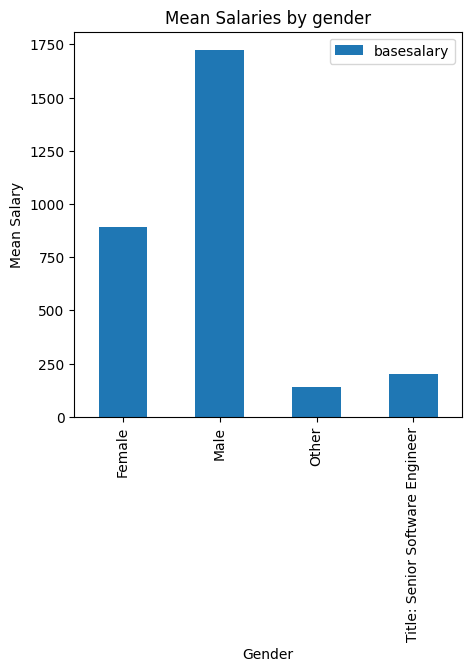

In [245]:
#sal_gender.plot(kind='barh',figsize=(5, 5))
sal_gender.plot(kind='bar',figsize=(5, 5),title="Mean Salaries by gender",xlabel = "Gender", ylabel = "Mean Salary") 


<p>This shows how much a gender earns on verahe</p>

In [246]:
df['company'].drop_duplicates().count()

1869

In [247]:
comp_sal = df.groupby('company')[['company','basesalary']]

C:\Users\Hammozi\AppData\Local\Temp\ipykernel_17312\882893731.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comp_sal.mean()['basesalary'].nlargest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by By Company(High Pay)",ylabel="Companies",xlabel="Average Base Salary")


<AxesSubplot: title={'center': 'Mean Salaries by By Company(High Pay)'}, xlabel='Average Base Salary', ylabel='Companies'>

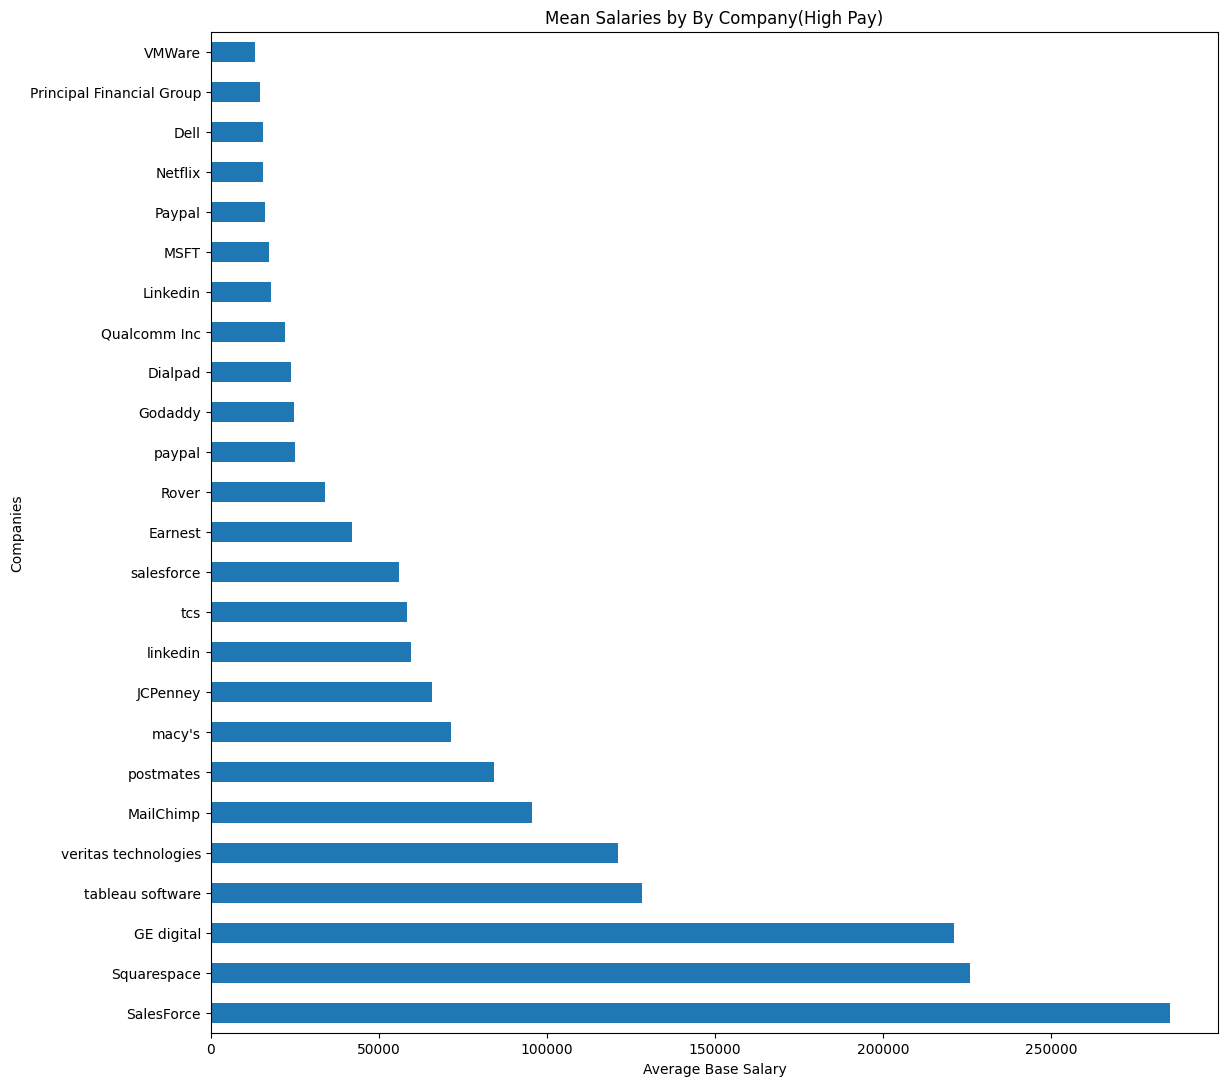

In [248]:
comp_sal.mean()['basesalary'].nlargest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by By Company(High Pay)",ylabel="Companies",xlabel="Average Base Salary") 

<p> Here I wanted to see, how does the Companies impact the base salary</p>

C:\Users\Hammozi\AppData\Local\Temp\ipykernel_17312\2329837862.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comp_sal.mean()['basesalary'].nsmallest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by By Company(Low Pay)",ylabel="Companies",xlabel="Average Base Salary")


<AxesSubplot: title={'center': 'Mean Salaries by By Company(Low Pay)'}, xlabel='Average Base Salary', ylabel='Companies'>

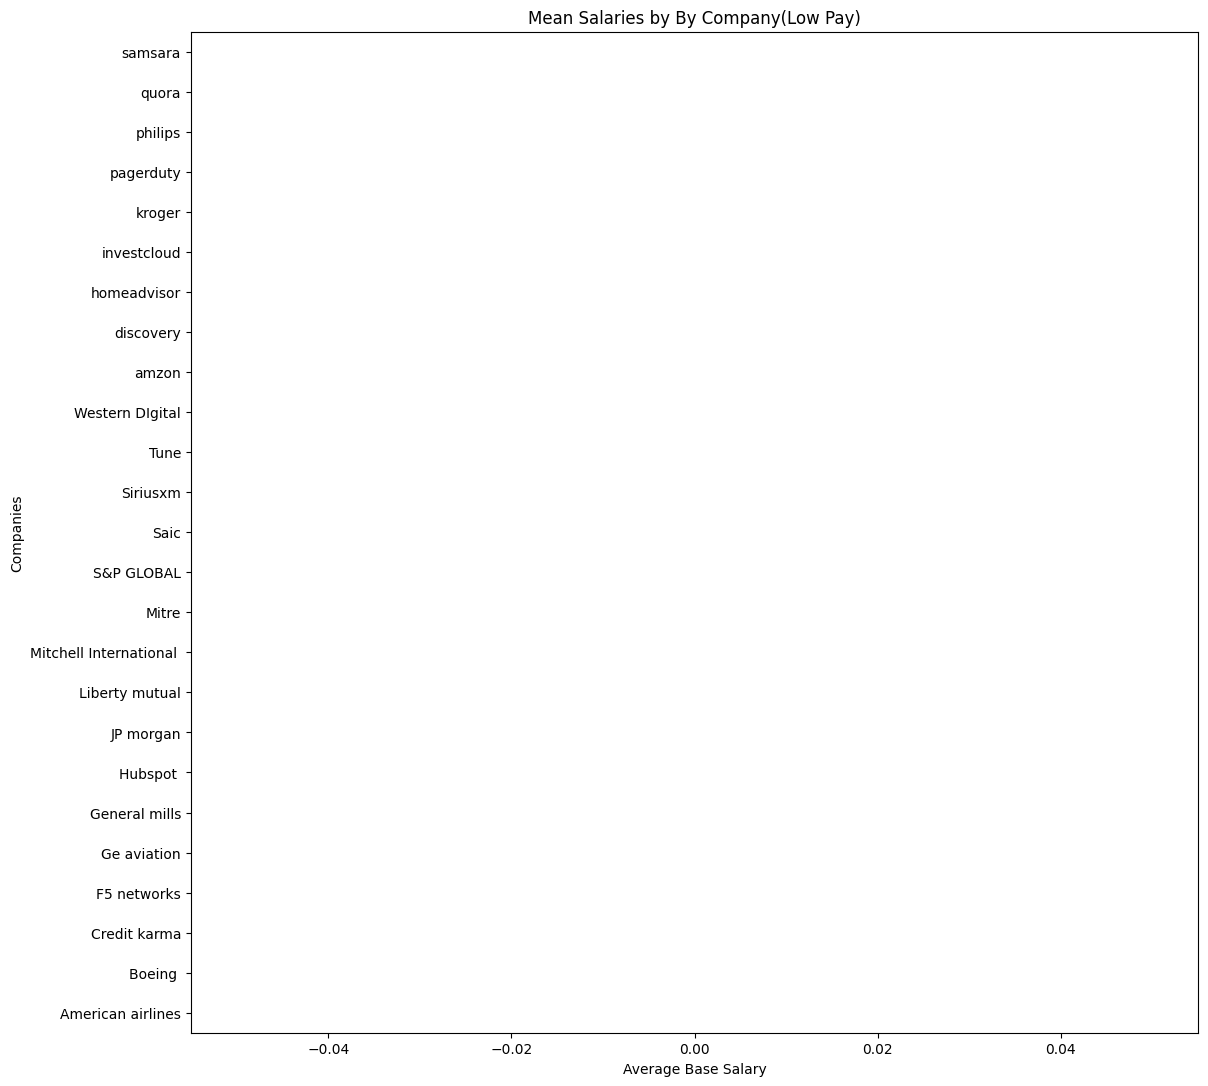

In [249]:
comp_sal.mean()['basesalary'].nsmallest(25).plot(kind='barh',figsize=(13, 13),title="Mean Salaries by By Company(Low Pay)",ylabel="Companies",xlabel="Average Base Salary") 

In [250]:
df['company'][df['basesalary']== 0 ].value_counts() 

Amazon                           462
Microsoft                        221
Google                           206
Facebook                         105
Apple                             80
IBM                               62
Salesforce                        53
Intel                             43
Oracle                            41
LinkedIn                          38
Uber                              33
Cisco                             30
Capital One                       28
Qualcomm                          28
eBay                              24
VMware                            23
Dropbox                           20
Accenture                         18
Twitter                           17
Netflix                           16
Intuit                            15
Dell Technologies                 15
Adobe                             14
Lyft                              14
SAP                               13
Airbnb                            13
JPMorgan Chase                    13
P

<p>  This helps us to see how man companies actually have 0 pays  </p>

In [251]:
df['yearsofexperience'].describe()

count    62642.000000
mean         7.191054
std          6.437148
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         90.000000
Name: yearsofexperience, dtype: float64

<p> The information here tells us about the years of experience an individual can have,
this also highlight that, there is some one who has 90 years of experienc, which seems in accurate</p2>

<h2>Dataset Cleanup and Analysis</h2>

In [252]:

df.drop(['tag','otherdetails','dmaid','rowNumber','cityid','timestamp'], axis=1, inplace=True)

<p>I dropped all the Columns that seemed irrelevant </p>
<p>For example otherdetails is full of invalid strings</p>
<p>and city_id and dmaid as they are unique, we dont use unique values to predict</p>

In [253]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender'],
      dtype='object')

In [254]:
df[df['gender']== 'Title: Senior Software Engineer']

company level              title  totalyearlycompensation  location  \
11793  GitHub    E4  Software Engineer                      217  Buda, TX   

       yearsofexperience  yearsatcompany  basesalary  stockgrantvalue  bonus  \
11793                 14               6         200               16      1   

                                gender  
11793  Title: Senior Software Engineer

<p>we are aiming to keep gender and use an impouter to replace with those nan values</p>

In [255]:
df['gender'].replace('Title: Senior Software Engineer',np.nan,inplace=True)

In [256]:
df.iloc[11793]

company                               GitHub
level                                     E4
title                      Software Engineer
totalyearlycompensation                  217
location                            Buda, TX
yearsofexperience                         14
yearsatcompany                             6
basesalary                               200
stockgrantvalue                           16
bonus                                      1
gender                                   NaN
Name: 11793, dtype: object

<p>This is verification if you have, Replaced the invalid value with Nan   </p>

In [257]:
df.shape

(62642, 11)

In [258]:
df = (df[df["basesalary"] > 30000] ).copy()

In [259]:
df.reset_index(drop=True, inplace=True)

<p>Since there were small value in the dataset for example There were base salaries with null and small values, I only kept the base salaries over 30K, This reduced the oversizevalue </p>

In [260]:
df.shape

(683, 11)

In [261]:
numeric_features = ['totalyearlycompensation','yearsofexperience','yearsatcompany','stockgrantvalue','bonus']
non_numeric_features = ['company','level','title','location','gender']
features = ['totalyearlycompensation','yearsofexperience','yearsatcompany','stockgrantvalue','bonus','company','level','title','location','gender']



# numeric_features = ['totalyearlycompensation','yearsofexperience','yearsatcompany']
# non_numeric_features = ['company','level','title','location']
# features = ['totalyearlycompensation','yearsofexperience','yearsatcompany','company','level','title','location']




In [262]:
df


company                             level  \
0                     Microsoft                                64   
1                        Amazon                                L5   
2                        Amazon                                L5   
3                     Microsoft                                59   
4                     Microsoft                                61   
5                      Facebook                                E6   
6                        Amazon                            SDE II   
7                        Google                                L5   
8                    Salesforce                              SMTS   
9                     Microsoft                               L63   
10                    Microsoft                                61   
11                       Oracle                                M4   
12                    Microsoft                                60   
13                         Uber                                II   
14                        Apple                              ICT2   
15                      Expedia                                 L   
16                       Amazon                                L5   
17                        Apple                              ICT4   
18                    Microsoft                                61   
19                       Intuit                             Staff   
20                       Amazon                                L7   
21                       Amazon                                L4   
22                       Amazon                                L6   
23                       Amazon                                 6   
24                     Linkedin                 Software Engineer   
25                    Pinterest                                L5   
26            Dell Technologies                                L8   
27                       Amazon                                L6   
28                    Microsoft                                63   
29                       VMware                             MTS 1   
30                     Facebook                                E6   
31                     Facebook                                E3   
32                   SalesForce                          Director   
33                    Microsoft                                63   
34                       Amazon                                L4   
35                       Amazon                                L6   
36                       Google                                T5   
37                    Microsoft                                67   
38                    Microsoft                               L61   
39                    Microsoft                                63   
40                        Apple                              ICT3   
41                         Snap                                L4   
42                       Google                                L7   
43                    Microsoft                                61   
44                    Microsoft                                61   
45                    Microsoft                                59   
46                    Microsoft                                62   
47                    Microsoft                                67   
48                       Google                                 7   
49                     Facebook                                E4   
50                       Cruise                               IC2   
51                     Facebook                                E4   
52                       Amazon                                L5   
53                       VMware                             MTS 3   
54                       Amazon                                L5   
55                       Google                                L4   
56                  CoverMyMeds                              Mid?   
57                    

<h2>Test and Dev Set Creation</h2>

In [263]:
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

C:\Users\Hammozi\AppData\Local\Temp\ipykernel_17312\1007378496.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(dev_df.corr(),annot=True)


<AxesSubplot: >

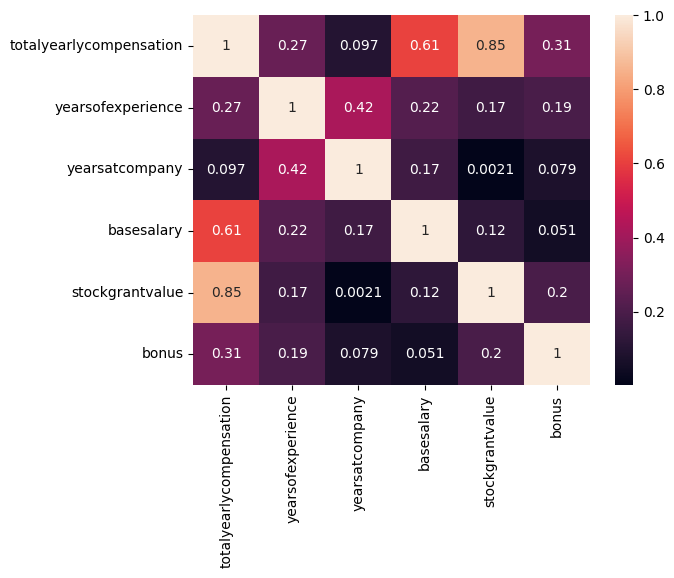

In [264]:
heatmap(dev_df.corr(),annot=True)

<p> Heatmaps are to see the correlation, This gives an idea how one colume changes with resp;ect the other</p>

In [265]:
df.shape

(683, 11)

In [266]:
class MetaTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

In [267]:
preprocessor = ColumnTransformer([
        ("num",Pipeline([("scaler", MetaTransformer())]), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
            ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                non_numeric_features)],
        remainder="passthrough")

<p> In my pre processor I use my Meta Transformet class so that I can use all of the three scalers and pick the best</p>
<p> I use Simple Imputer this was foe the Nan Values in the Gender Column, I chose most frequnt as The Gender is a non numeric valuse
then I finally one hot encode my values </p> 

In [268]:
dev_x = dev_df[features]
test_x = test_df[features]
dev_y = dev_df["basesalary"].values
test_y = test_df["basesalary"].values

<p>here I choose my features and values of the Target feature to be able to predict    </p>

 <h2>K-Nearst Neighbour</h2>

<p> K Nearst neighbour can be used with Grid Search where we can get best number of nearst neighbours I chose KNN instead of One Nearst Neighbour because it sensitive to noisy data ,In my grid I used K Fold Cross validation with 10 folds because our dataset is only a few hundreds.
It turns out that we are overfittig on K nearst Neighbour</p>

<p> In KNN i get High Validation Error andLow training _error</p>
<p>I expected this overfitting here as our dataset is quite small. Less examples and more features </p>
<p>What KNN does is it looks at the similar values of the features i.e. neighbours</p>

In [278]:
knn_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor",KNeighborsRegressor())])
knn_param_grid = {"predictor__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                  "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}
knn_gs = GridSearchCV(knn_model, knn_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)
knn_gs.fit(dev_x, dev_y)
knn_gs.best_params_, knn_gs.best_score_


({'predictor__n_neighbors': 9,
  'preprocessor__num__scaler__transformer': RobustScaler()},
 -39883.13646838758)

scores = cross_validate(knn_gs, dev_x, dev_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

<h2>Linear Regression</h2>

<p>Linear Regressions did best on dev_set, again we used K ford Cross Validation as we are dealing with a few hundred values</p>

In [270]:
l = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor",  LinearRegression())])
l.fit(dev_x, dev_y)
mean_absolute_error(dev_y, l.predict(dev_x))

2.3448502411106397e-05

In [271]:
scores = cross_validate(l, dev_x, dev_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  5.452035955195521e-05
Validation error:  5.8066186908213505e-05


<p>Linear Regressions did best on dev_set, again we used K ford Cross Validation as we are dealing with a few hundred values</p>

<h2>Ridge Regression</h2>

<p> Ridig Regressions done as good as the Linear Regressio=</p>

In [279]:
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])
ridge_param_grid = {"predictor__alpha": [0,35.0,40.0, 45.0, 50.0]}
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)
ridge_gs.fit(dev_x, dev_y)
ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 0}, -5.806546050085848e-05)

In [280]:
scores = cross_validate(ridge, dev_x, dev_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  5.452060862935513e-05
Validation error:  5.807507222386819e-05


<h2>Random Forest</h2>

<p>My reson for chocies the random forest was , I wanted to see how small datasett would do when using/p>

In [283]:
rf = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor",  RandomForestRegressor(random_state=4))])

In [284]:
rf.fit(dev_x, dev_y)
mean_absolute_error(dev_y, rf.predict(dev_x))

7329.615274725274

In [285]:
scores = cross_validate(rf, dev_x, dev_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  7891.238655436061
Validation error:  20330.191017508416


<h2>Evaluation on the Testset</h2>

In [286]:
mean_absolute_error(test_y, knn_gs.predict(test_x))

34377.10462287105

In [287]:
mean_absolute_error(test_y, l.predict(test_x))

2.4727394051907626e-05

In [288]:
mean_absolute_error(test_y, ridge_gs.predict(test_x))

2.4731809018013223e-05

In [289]:
mean_absolute_error(test_y, rf.predict(test_x))

21519.534890510946

<h2>Expirements</h2>

<p>Insted of using just small dataset lets get in more trainign examples to see if o</p>
<p> One questions that stands, out of a 62000 data set when I only used 683 examples, In those examples </p>
<p> How woudld I get more exmples ?, I asked myself what makes the salary.</p>
<p>I turnes out that totalyearlycompensation is a sum of base salary , bonus and stock value</p>
<p>What I noticed was those  small values are legit as the base salary , bonus and stock value </p>
<p> lets see how would the data react with high number </p>
<p> More training examps are like can reduce overfulittim</p>

 <p> I re-read in original df</p>

In [290]:
df = pd.read_csv('datasets/dataset_salaries.csv')

In [291]:
df = (df[df["basesalary"] != 0] ).copy()
df.reset_index(drop=True, inplace=True)
df['gender'].replace('Title: Senior Software Engineer',np.nan,inplace=True)

<p>I Only kept the rows that are not 0</p>

In [292]:
df.shape

(60338, 17)

In [293]:
x = df[features]

y = df["basesalary"].values

dev_x, test_x, dev_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

<p> We wiil use holdout stratgy as we are now dealing with the larger dataset</p>

In [294]:
class MetaTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

In [295]:
preprocessor = ColumnTransformer([
        ("num",Pipeline([("scaler", MetaTransformer())]), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
            ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                non_numeric_features)],
        remainder="passthrough")

In [296]:
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])
ridge_param_grid = {"predictor__alpha": [0,35.0,40.0, 45.0, 50.0]}
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error")
ridge_gs.fit(dev_x, dev_y)
ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 0}, -7.423879408927504e-05)

In [297]:
mean_absolute_error(dev_y, ridge_gs.predict(dev_x))

7.284355124225983e-05

<p>Ridge Still Does Better</p>